# NetworkX

## Read data

In [2]:
import pandas as pd

original_dat = pd.read_csv('./data/survey_answer_595.csv')
answer_dat = pd.read_csv('./data/survey_answer_encoded.csv')
text_dat = pd.read_csv('./data/survey_answer_text.csv')

## Parser (Okt)

다른거로 바꿔도 무방함

In [3]:
from konlpy.tag import Mecab, Okt

okt = Okt()

## Co-occer

In [29]:
from soynlp.vectorizer import sent_to_word_contexts_matrix

x_, idx2vocab = sent_to_word_contexts_matrix(
    text_dat['text'],
    windows=5,
    min_tf=10,
    tokenizer=okt.morphs, # (default) lambda x:x.split(),
    dynamic_weight=False,
    verbose=True
)

Create (word, contexts) matrix
  - counting word frequency from 296 sents, mem=0.580 Gb
  - scanning (word, context) pairs from 296 sents, mem=0.583 Gb
  - (word, context) matrix was constructed. shape = (20, 20)                    
  - done


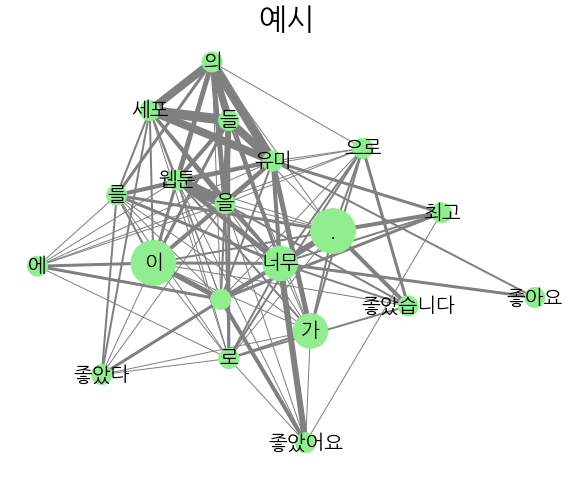

In [45]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure, text

plt.rcParams["font.family"] = 'NanumGothic'

G = nx.Graph()
weight_matrix = x_.toarray()

for ix_1 in range(x_.shape[0]):
    for ix_2 in range(x_.shape[1]):
        if ix_1 != ix_2:
            G.add_edge(idx2vocab[ix_1], idx2vocab[ix_2], weight=weight_matrix[ix_1][ix_2])
        else:
            G.add_node(idx2vocab[ix_1], weight=weight_matrix[ix_1][ix_2])
            
node_weights = nx.get_node_attributes(G, 'weight').values()
edge_weights = nx.get_edge_attributes(G,'weight').values()

label_dict = dict()
for i, word in enumerate(idx2vocab):
    label_dict[i] = word
    
pos = nx.circular_layout(G)
plt.figure(figsize=(10,8))
plt.title('예시', size=30)
pos=nx.shell_layout(G)
nx.draw(G,  
        width=list(edge_weights),
        with_labels=True,
        node_color='lightgreen',
        edge_color='gray',
        node_size=list((np.array(list(node_weights)) + 1) * 400),
        font_family='NanumGothic',
        font_size=20)